# Data frames with Pandas

## Programming and Data Management (EDI 3400)

### *Vegard H. Larsen (Department of Data Science and Analytics)*

# 1. What is Pandas?

Pandas is a premier data manipulation and analysis library in Python, providing intuitive structures for organizing and processing data alongside a suite of powerful tools to explore, clean, and analyze it. Central to Pandas are its two primary data structures: the `Series`, which handles one-dimensional data, and the `DataFrame`, designed for two-dimensional data (akin to tables in a database or Excel sheets). With these structures, you can easily read data from various sources, manipulate rows and columns, handle missing values, and even merge or aggregate data from multiple tables. Many tasks traditionally done in spreadsheet software can be more efficiently and robustly performed in code, laying a foundational bridge between basic Python programming and the vast world of data analysis.

## Introduction to Pandas

- A library that makes working with multidimensional structured and tabular data fast and easy
- The name is derived from *panel data* and *Python data analysis* 
- Built in support for working with time series data
- Provides Excel-like functionality to Python
- Makes data cleaning and analysis fast and convenient in Python

## Importing Pandas 

- As with NumPy there is a common import convention for Pandas

In [ ]:
import pandas as pd

In [ ]:
pd.__version__

# 2. Pandas data structures 

## Data structures in `Pandas`

1. Series - One dimensional array of data 
2. DataFrame - Can consist of many Series as columns in the DataFrame
3. Panel - Can consist of many DataFrames (will not be covered in this course)

## Pandas Series-object

- A one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)

In [ ]:
import pandas as pd

series1 = pd.Series([100, 200, 300, 400])

In [ ]:
series1

In [ ]:
type(series1)

## Working with the Series

In [ ]:
# Getting out values

series1[0]

In [ ]:
# Assigning values

series1[1] = 1234

In [ ]:
series1

In [ ]:
# Slicing

series1[0:4]

## Numerical operations 

In [ ]:
# We can initialize a Series from a dictionary

s1 = pd.Series({'a': 10, 'b': 20, 'c': 30})
s2 = pd.Series({'a': 0.1, 'b': 0.2, 'c':0.3, 'd':0.4, 'e': 0.5})

In [ ]:
s1

In [ ]:
s1 * 2

In [ ]:
s3 = s1 + s2
s3

## Series methods

In [ ]:
# Drop nans

s4 = s3.dropna()

In [ ]:
s3

In [ ]:
# Drop particular indexes

s3.drop(['a', 'e'])

In [ ]:
s1

In [ ]:
s2

In [ ]:
# We can concatenate data

pd.concat([s1,s2])

## Pandas DataFrame-object

In [ ]:
import pandas as pd

content = [['a', 1, 'apple'], 
           ['b', 2, 'banana'], 
           ['c', 3, 'orange']]

dataframe1 = pd.DataFrame(content,
                          columns=['letter', 'number', 'fruit'],
                          index=['one', 'two', 'three'])

In [ ]:
pd.DataFrame(content)

In [ ]:
dataframe1

In [ ]:
type(dataframe1)

## Working with the DataFrame

In [ ]:
column_fruit = dataframe1['fruit']

In [ ]:
column_fruit

In [ ]:
type(column_fruit)

In [ ]:
# Use loc to access a row from the DataFrame

row_1 = dataframe1.loc['two']

In [ ]:
row_1

In [ ]:
## Use iloc to access row by numerical index

row_0 = dataframe1.iloc[0]

In [ ]:
row_0

## Viewing data

In [ ]:
import numpy as np

df = pd.DataFrame(np.random.randn(100, 4), columns=list("ABCD"))

In [ ]:
# Look at the 3 first rows

df.head()

In [ ]:
# Look at the 3 last rows

df.tail(3)

In [ ]:
# We can look at a random sample of rows

df.sample(5)

## Sorting data

In [ ]:
# We can sort by the values in a given column

df.sort_values(by='A', ascending=False)

## Slicing and selection

In [ ]:
# Selecting via [] slices the rows

df[6:8]

In [ ]:
# We can also slice the columns

df.iloc[0:11, 1:3]

In [ ]:
# We can also ask for very specific slices

df.iloc[[0, 5, 6, 8], [0, 3]]

## Statistical methods 

In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generating data on subject scores in 3 subjects for 100 students.
data = {
    'Math': np.random.randint(50, 100, 100),
    'English': np.random.randint(25, 75, 100),
    'History': np.random.randint(40, 90, 100)
}

df = pd.DataFrame(data)
print(df.head())  # Print the first 5 rows

In [ ]:
# Mean Score of Each Subject:

mean_scores = df.mean(axis=0)

print("Mean Scores:\n", mean_scores)

In [ ]:
# Median Score of Each Subject:

median_scores = df.median()

print("\nMedian Scores:\n", median_scores)

In [ ]:
# Standard Deviation of Each Subject:

std_dev = df.std()
print("\nStandard Deviation:\n", std_dev)

In [ ]:
# Highest and Lowest Score in Math:

max_math = df['Math'].max()
min_math = df['Math'].min()

print("\nHighest Math Score:", max_math)
print("Lowest Math Score:", min_math)

In [ ]:
# Correlation Between Subjects:

correlation = df.corr()
print("\nCorrelation between subjects:\n", correlation)

In [ ]:
# Number of Students Scoring Above 90 in English:

above_90_english = df[df['English'] > 70].shape[0]
print("\nNumber of students scoring above 90 in English:", above_90_english)

# 3. Time series data

## Pandas has great functionality for working with dates

In [ ]:
# We can create an index with dates 

dates = pd.date_range(start="2022-09-01", periods=30, freq='M')

In [ ]:
dates

In [ ]:
#pd.date_range?

### freq-options (non-exclusive list)

| Within Day | Within Month | Lower frequency |
| --- | --- | --- |
| S (seconds)        | D (calendar day) | M (monthly)          |
| T (minutely)       | B (business day) | QS (quarterly start) |
| H (hourly))        | W (weekly)       | Q (quarterly end)    |
| BH (business hour) | SM (semi-month)  | A, Y - (yearly)      |

In [ ]:
dates

In [ ]:
# Create a dataframe with random numbers and use the index with dates

df = pd.DataFrame(np.random.randn(30, 4), 
                  columns=list("ABCD"),
                  index=dates)



In [ ]:
df

In [ ]:
# A new data frame that isthe cummulative sum of the random numbers
df_sum = df.cumsum()

In [ ]:
#df.cumsum?

In [ ]:
df_sum

In [ ]:
# Pandas has built in plotting

df.resample('A').mean().plot()

# 4. Importing and exporting data

In [1]:
import pandas as pd
# Pandas has many different read methods 

data = pd.read_clipboard

In [7]:
columns = pd.read_clipboard()

In [8]:
columns =

,September,2023,August,2023.1,-,September.1,2023.2,September.2,2022,-.1,September.3,2023.3


In [9]:
data.columns = ['Consumer Price Index', 'September 2023', '', '']

In [11]:
data

,Consumer Price Index,September 2023,,
0,CPI All-item index,129.8,-0.1,3.3
1,Food and non-alcoholic beverages,128.6,-1.2,7.4
2,Alcoholic beverages and tobacco,122.6,0.2,4.9
3,Clothing and footwear,106.8,5.0,6.0
4,"Housing, water, electricity, gas and other fuels",128.1,-1.8,-4.9
5,"Furnishings, household equipment and routine m...",139.1,1.8,6.4
6,Health,122.9,-0.2,4.0
7,Transport,136.7,0.3,6.3
8,Communications,124.9,0.8,5.4
9,Recreation and culture,139.0,0.6,9.3


## From Excel:

In [17]:
data_excel = pd.read_excel('files/travel_changeFromSameMonth2019.xlsx')
data_excel.head()

,Month,EU,Norge
0,2020-01-01,4.95,9.30
1,2020-02-01,6.15,13.01
2,2020-03-01,-61.04,-54.72
3,2020-04-01,-95.24,-84.19
4,2020-05-01,-89.54,-62.28


In [16]:
#data_excel['Month']

In [18]:
# We can get Pandas to read the dates for us 

data_excel = pd.read_excel('files/travel_changeFromSameMonth2019.xlsx',
                     index_col=[0],
                     parse_dates=True)
data_excel.head()

,EU,Norge
Month,,
2020-01-01,4.95,9.30
2020-02-01,6.15,13.01
2020-03-01,-61.04,-54.72
2020-04-01,-95.24,-84.19
2020-05-01,-89.54,-62.28


In [19]:
data_excel.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

<Axes: xlabel='Month'>

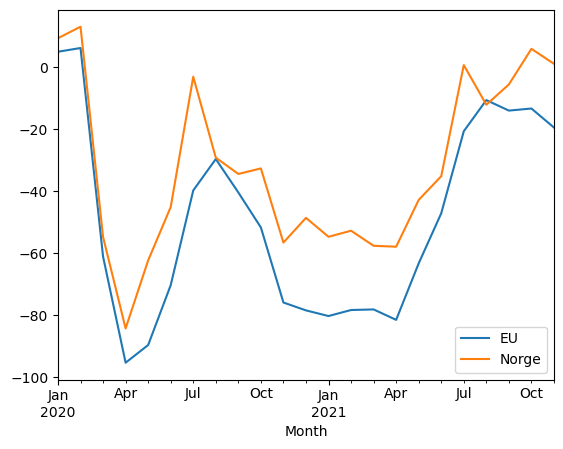

In [20]:
data_excel.plot()

## From csv (Comma Separated Values):

In [21]:
# Reading a csv-file

data_csv = pd.read_csv('files/travel_changeFromSameMonth2019.csv',
                      index_col=[0],
                      parse_dates=True)
data_csv.index

Index(['Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
       'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
       'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21', 'Sep-21',
       'Oct-21', 'Nov-21'],
      dtype='object', name='Month')

## Save dataframe as a csv-file

In [22]:
# Let's create some random data 
import numpy as np

df1 = pd.DataFrame(np.random.randn(30,5),
                   columns=list('ABCDE'),
                   index=pd.date_range('1990-01-01', periods=30, freq='A'))
df1.tail()

,A,B,C,D,E
2015-12-31,-1.221713,0.288369,0.965570,-1.532735,0.158710
2016-12-31,2.632335,1.027693,-0.865547,0.708637,0.506467
2017-12-31,-0.103834,-0.775180,0.437511,-0.898132,-0.016043
2018-12-31,2.024931,-0.265221,1.415357,0.272922,1.369640
2019-12-31,-1.114263,1.556677,-0.364606,-3.540534,0.409568


In [23]:
# The .to_csv method saves the dataframe as a csv file

df1.to_csv('random_numbers10.csv')